In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('laptops_10.csv', encoding = 'latin-1')
df2 = pd.read_csv('kc_house_data.csv', encoding = 'latin-1')


Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать следующие данные: kc-house-data и laptop_price
1.2. Изучите стоимости недвижимости
1.3. Изучите распределение квадратуры жилой
1.4. Изучите распределение года постройки

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int32  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

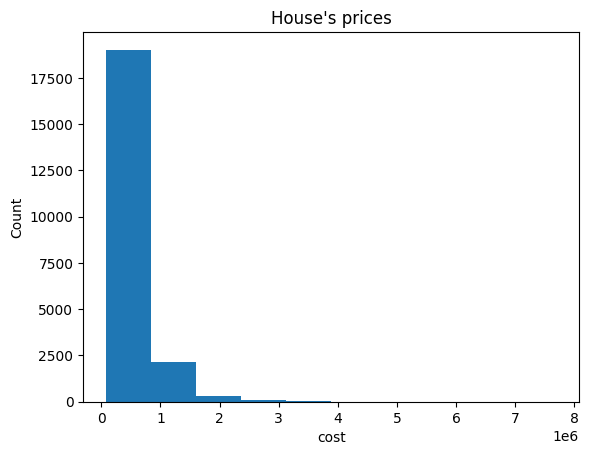

In [45]:
plt.hist(df2['price'])
plt.xlabel('cost')
plt.ylabel('Count')
plt.title("House's prices");

Вывод: большая часть домов стоимостью менее 1млн.

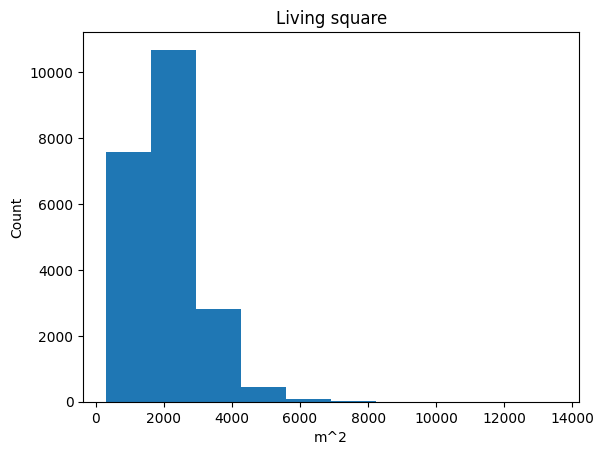

In [6]:
plt.hist(df2['sqft_living'])
plt.xlabel('m^2')
plt.ylabel('Count')
plt.title("Living square");

Вывод: Примерно половина домов имеют жилую площадь от 1000 до 3000 м^3

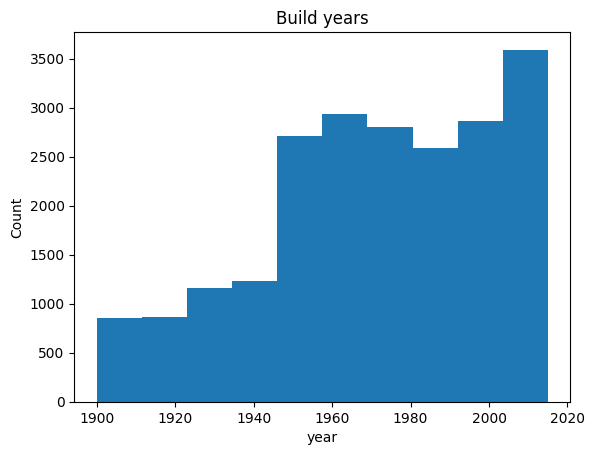

In [7]:
plt.hist(df2['yr_built'])
plt.xlabel('year')
plt.ylabel('Count')
plt.title("Build years");

Вывод: год постройки большинства домов больше 1950. Более 3500 возрастом не более 20 лет

Условие 2: 2 задача
2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2. Изучите распределение этажей домов
2.3. Изучите распределение состояния домов

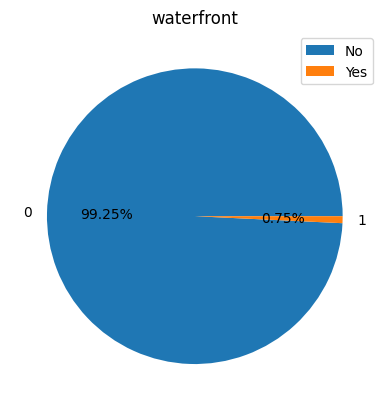

In [16]:
data=df2['waterfront'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(['No','Yes'])
plt.title("waterfront");

Вывод: Менее 1% домов имеют вид на набержную

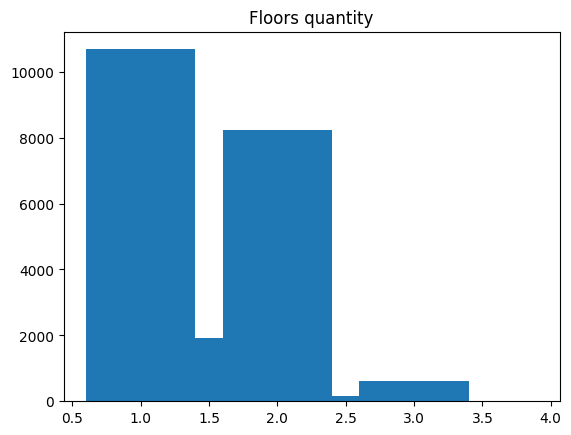

In [19]:
data=df2['floors'].value_counts()
plt.bar(data.index, data.values)
plt.title("Floors quantity");

Вывод: Большим спросом пользуются одноэтажные дома. Очень маленький спрос на 3-этажные дома.

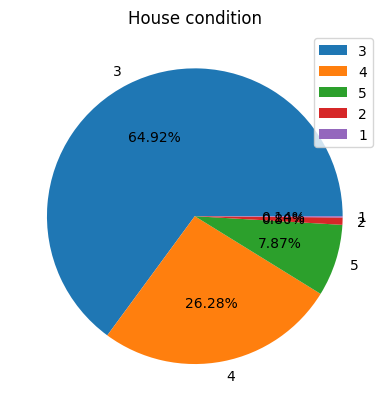

In [20]:
data=df2['condition'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index)
plt.title("House condition");

Вывод: Почти 2/3 домов в удовлетворительном состоянии. Чуть больше четверти - в хорошем. Почти 8% - в отличном. И менее 1% находятся в плохом состоянии

Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [21]:
import seaborn as sns

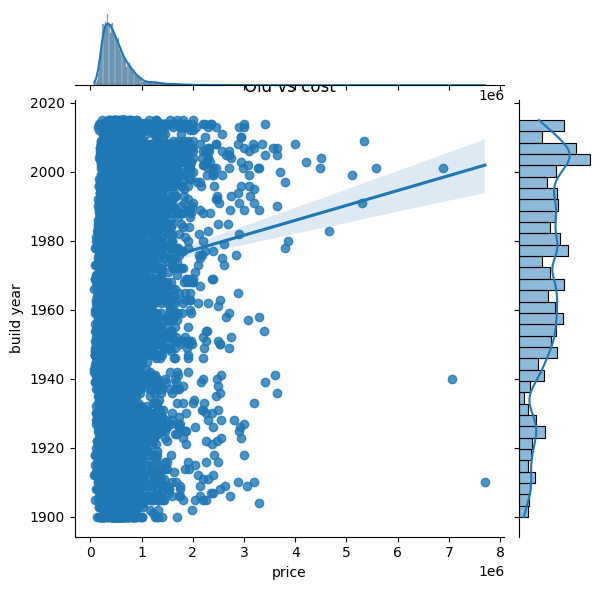

In [56]:
sns.jointplot(x=df2['price'], y=df2['yr_built'], kind='reg')
plt.xlabel("price")
plt.ylabel("build year")
plt.title("Old vs cost");

Вывод: Год постройки не сильно влияет на стоимость дома

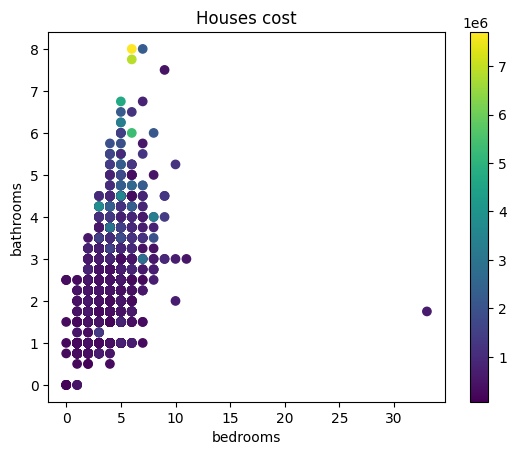

In [32]:
sc=plt.scatter(df2['bedrooms'], df2['bathrooms'], c=df2['price'])
plt.colorbar(sc)
plt.xlabel("bedrooms")
plt.ylabel("bathrooms")
plt.title("Houses cost");

Вывод: количество спален больше влияет на цену, чем количество ванных комнат

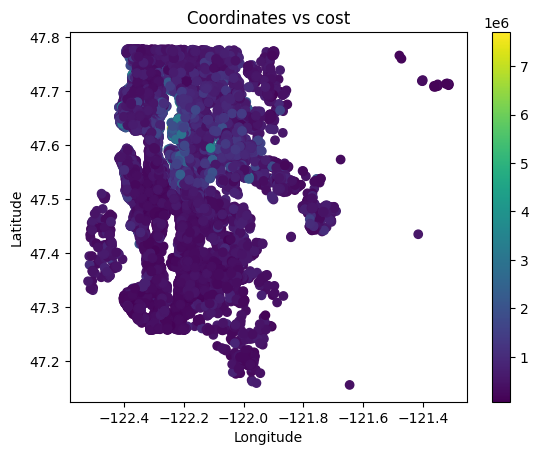

In [50]:
sc = plt.scatter(df2['long'], df2['lat'], c=df2['price'])

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Coordinates vs cost");

Вывод: Цена в основном не зависит от расположения дома. Но, есть небольшой район с повышенной стоимостью на жилье

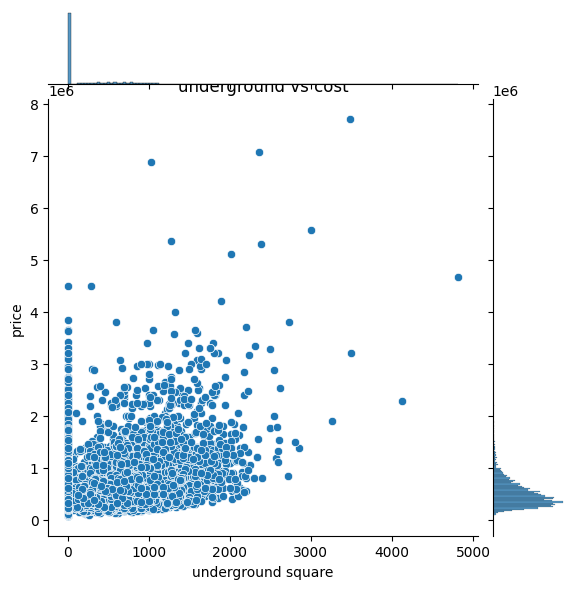

In [59]:
sns.jointplot(x=df2['sqft_basement'], y=df2['price'], kind='scatter')
plt.xlabel("underground square")
plt.ylabel("price")
plt.title("underground vs cost");

Вывод: прямая зависимость стоимости дома от площади цокольных этажей и подвалов не прослеживается

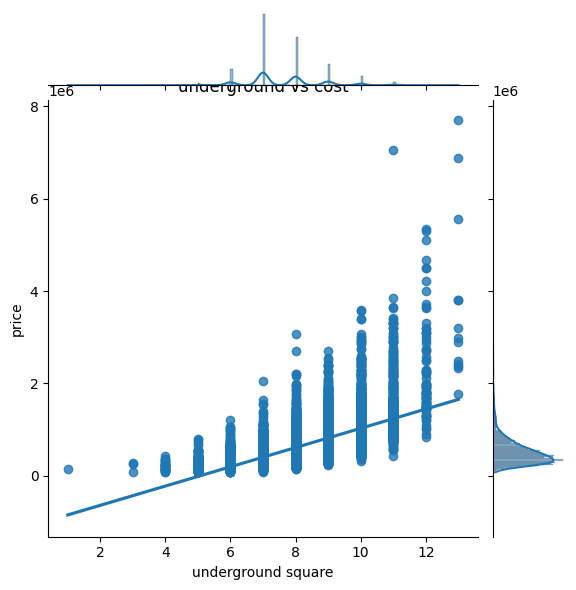

In [61]:
sns.jointplot(x=df2['grade'], y=df2['price'], kind='reg')
plt.xlabel("grade")
plt.ylabel("price")
plt.title("grade vs cost");

Вывод: Стоимость дома напрямую зависит от качества конструкции и дизайна.

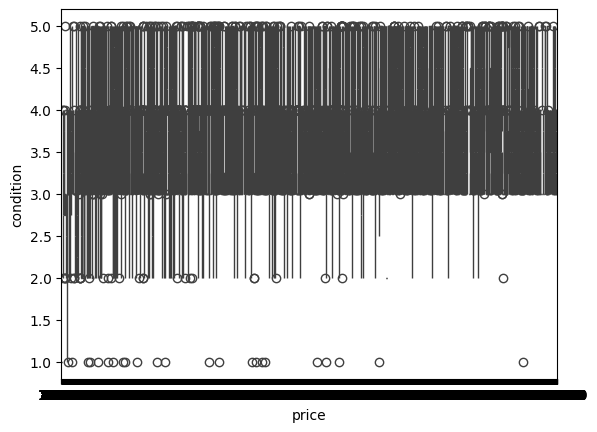

In [48]:
sns.boxplot(x=df2['price'], y=df2['condition'], whis=1.5)
plt.xlabel('price')
plt.ylabel('condition');

"ящик с усами" показывает что-то странное. Невозможно сделать выводы